#  Introduction 

The dataset comes from the data science team at Apprentice Chef, and this first case is related to revenue from the company. THE GOAL IS TO BUILD A MACHINE LEARNING MODEL TO PREDICT REVENUE OVER THE FIRST YEAR OF EACH CUSTOMER'S LIFE CYCLE.

The second case is to related to Apprentice Chef's cross-selling promotion, Halfway There; where subscribers receive a half bottle of wine from a local vineyard every Wednesday(halfway through the week). Apprentice Chef would like to promote this service to a wider audience. THE GOAL OF THIS CASE IS TO BUILD A MACHINE LEARNING MODEL TO PREDICT WHICH CUSTOMER WILL SUBSCRIBE TO THE SERVICE.

In [1]:
# importing libraries
import pandas as pd # Data Science essentials
import matplotlib.pyplot as plt # Data visualization essentials 
import seaborn as sns # Enhanced data visualization essentials 
import numpy as np # Mathemetical essentials 
import statsmodels.formula.api as smf # Regression modelling
from sklearn.linear_model import LinearRegression# linear regression (scikit-learn)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File name
file = 'Apprentice_Chef_Dataset2.xlsx'

## Reading the file into python 
app_chef = pd.read_excel(io = file)

## Reading the file for the halfwaythere case 
#app_chef_ht = app_chef.copy()


# Checking the first five rows of the dataset 
app_chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {app_chef.shape[0]}
Features:     {app_chef.shape[1]}


Each customer met at least one of the following criteria:
• at least one purchase per month for a total of 11 of their first 12 months
• at least one purchase per quarter and at least 15 purchases throughout their first year

""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28


Each customer met at least one of the following criteria:
• at least one purchase per month for a total of 11 of their first 12 months
• at least one purchase per quarter and at least 15 purchases throughout their first year




# Case 1: Revenue

## Feature Engineering  

In this process, I extracted new features from the dataset provided to try to improve the performance of the model in predicting revenue. 

The following new features we're created:
1. Email domain group: Junk, Professional and Personal
2. Has canceled an order 
3. Has a package order 
4. Total cancellations 
5. Average Spending


In [3]:
#Categorical variables: Email domains 
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in app_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = app_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df



# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
app_chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = [ '0' , 'EMAIL_DOMAIN' ]


# concatenating personal_email_domain with friends DataFrame
app_chef = pd.concat([  app_chef, email_df['EMAIL_DOMAIN']  ],
                   axis = 1)


# printing value counts of personal_email_domain
app_chef.loc[ : ,'EMAIL_DOMAIN'].value_counts()


#Aggregating the email domains into personal and professional and junk groups
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com',
                              '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com',
                              '@cisco.com', '@cocacola.com', 
                              '@disney.com', '@dupont.com',
                              '@exxon.com', '@ge.org',
                              '@goldmansacs.com', '@homedepot.com',
                              '@ibm.com','@intel.com',
                              '@jnj.com', '@jpmorgan.com',
                              '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com',
                              '@pfizer.com', '@pg.com',
                              '@travelers.com', '@unitedtech.com',
                              '@unitedhealth.com', '@verizon.com',
                              '@visa.com', '@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com',
                      '@hotmail.com', '@live.com',
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in app_chef['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
            
        elif '@' + domain in personal_email_domains:
                placeholder_lst.append('PERSONAL')
            
        elif '@' + domain in junk_email_domains:
                placeholder_lst.append('JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
app_chef['email_domain_group'] = pd.Series(placeholder_lst)


# checking results
app_chef['email_domain_group'].value_counts()




PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: email_domain_group, dtype: int64

In [4]:
# Quick Calculation 

PERSONAL      =  861
PROFESSIONAL  =  696
JUNK         =   389

email_domain = PERSONAL + PROFESSIONAL + JUNK

pct_junk = (JUNK/email_domain)*100


print(f"""
The percentage of customers that used emails in the junk email domain to register for Apprentice Chef's services is {pct_junk}%.
Approximately 20%.

""")


The percentage of customers that used emails in the junk email domain to register for Apprentice Chef's services is 19.98972250770812%.
Approximately 20%.




In [5]:
# STEP3: One-Hot Encoding
one_hot_email_domain = pd.get_dummies(app_chef['email_domain_group'])

# dropping original columns and keeping the encoded ones 
app_chef = app_chef.drop(['email_domain_group','EMAIL',
                                  'EMAIL_DOMAIN'], axis = 1)


# Adding encoded columns to dataset 
app_chef = app_chef.join(one_hot_email_domain)


# Showing the output of the first engineered feature 
#app_chef[['JUNK', 'PERSONAL', 'PROFESSIONAL']].head()

In [6]:
# Dummy variable for cancellations and locker 
app_chef['has_cancelled'] = 0
app_chef['has_locker'] = 0
 

for index, value in app_chef.iterrows():
    # Cancellations before noon 
    if app_chef.loc [index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        app_chef.loc [index, 'has_cancelled'] = 1
   
    # Cancellations after noon
    if app_chef.loc [index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        app_chef.loc [index, 'has_cancelled'] = 1
    
    # Package locker
    if app_chef.loc [index, 'PACKAGE_LOCKER'] > 0:
        app_chef.loc [index, 'has_locker'] = 1
        
    # Refrigerated locker 
    if app_chef.loc [index, 'REFRIGERATED_LOCKER'] > 0:
        app_chef.loc [index, 'has_locker'] = 1
        
# Showing output for second engineered feature 
# Just checking 
#app_chef[['has_cancelled', 'has_locker']].head()


In [7]:
# Total Cancellations 
app_chef['Total_Cancellations'] = app_chef['CANCELLATIONS_BEFORE_NOON'] + app_chef['CANCELLATIONS_AFTER_NOON']

In [8]:
# Averege Spending
# Average speding per customer 
app_chef['av_spending'] = (app_chef['REVENUE']
                           /app_chef['TOTAL_MEALS_ORDERED'])#.round(0)



## Correlation Analysis  

In [9]:
# Pearson Correlation between the response variable (cross_sell_success) and the explanatory variables 
df_corr = app_chef.corr(method = 'pearson').round(decimals = 2)

df_corr['REVENUE'].sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
MOBILE_NUMBER                  0.03
av_spending                    0.02
PC_LOGINS                      0.02
CANCELLATIONS_BEFORE_NOON      0.01
PERSONAL                       0.01
TASTES_AND_PREFERENCES         0.01
WEEKLY_PLAN                    0.01
has_cancelled                  0.01
PROFESSIONAL                   0.01
EARLY_DELIVERIES              -0.00
CROSS_SELL_SUCCESS             0.00
Total_Cancellations            0.00
REFRIGERATED_LOCKER           -0.00
has_locker                    -0.01
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
JUNK                          -0.02
MOBILE_LOGINS               

## Regression Analysis: OLS Regression 

I used the OLS regression to clearly identify the features that affect revenue. 

In [10]:
# Logging  
app_chef['log_revenue'] = np.log(app_chef['REVENUE'])
app_chef['log_tmo'] = np.log(app_chef['TOTAL_MEALS_ORDERED'])
app_chef['log_atpv'] = np.log(app_chef['AVG_TIME_PER_SITE_VISIT'])
app_chef['log_ave_prep_vid_time'] = np.log(app_chef['AVG_PREP_VID_TIME'])

In [11]:
# preparing explanatory variable data
app_chef_data = app_chef.drop(['REVENUE','log_revenue','NAME', 'FIRST_NAME',
                               'FAMILY_NAME', 'TOTAL_MEALS_ORDERED',
                               'AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME'
                                                  ], axis = 1)



# preparing response variable data
app_chef_target = app_chef.loc[:, 'REVENUE']


# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size = 0.25,
            random_state = 219)



In [12]:
# declaring set of x-variables that are significant 
x_variables = [ 'CONTACTS_W_CUSTOMER_SERVICE',
                                        'LATE_DELIVERIES',
                                        'MASTER_CLASSES_ATTENDED',
                                        'MEDIAN_MEAL_RATING',
                                       'AVG_CLICKS_PER_VISIT',
                                        'TOTAL_PHOTOS_VIEWED',
                                        'JUNK',
                                        'PERSONAL',
                                        'PROFESSIONAL',
                                        'log_tmo',
                                        'log_ave_prep_vid_time',
                                        'av_spending', ]


# looping to make x-variables suitable for statsmodels
#for val in x_variables:
    #print(f"{val} +")

In [13]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = app_chef[x_variables]

# OLS p-value x-dataset (normal Y)
# Dont forget to put the OLS below 
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            app_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [14]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

# Saving scoring results
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8337
OLS Testing Score  : 0.8393
OLS Train-Test Gap : 0.0056


The regression model created performed very well with a score of approximately 84%

In [15]:
# zipping each feature name to its coefficient
lr_model_values = zip(app_chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)
    

('intercept', -7696.12)
('CONTACTS_W_CUSTOMER_SERVICE', 18.15)
('LATE_DELIVERIES', 11.53)
('MASTER_CLASSES_ATTENDED', 91.53)
('MEDIAN_MEAL_RATING', 51.39)
('AVG_CLICKS_PER_VISIT', -28.07)
('TOTAL_PHOTOS_VIEWED', 0.57)
('JUNK', -39.6)
('PERSONAL', 16.82)
('PROFESSIONAL', 22.78)
('log_tmo', 1631.22)
('log_ave_prep_vid_time', 285.85)
('av_spending', 46.45)


In [16]:
## R-Squared
lr.score(x_train_OLS, y_train_OLS).round(3)

0.834

The results above show the combined features that make up the regression model and their coefficients (in $) with R-Squared to be 83.4% and it accounts for the variation in REVENUE explained by the significant explanatory variables above.

### Insights from the Regression Model 

From the coefficients of the model features above, I'll be giving insight on the negatives and how to manage them. 

### Email Domain Group: Junk  

Approximately 20% of Apprentice Chef's total customers registered using an email in the junk email domain category and for every email in the junk email domain category, Apprentice Chef looses approximately $40. People within this category maybe once in a blue moon customers or there may have been a time when these individuals paid for your service and didn't want to be fully committed to your service offerings hence the reason for using those emails.


To fix / manage this, Apprentice Chef will need to:
1. cut down on resources spent towards these customers 
2. monitor the usage of its services by these customers and in the end try to make the frequent visitors from this category commit. 

###  Avg Clicks per Visit 

Apprentice Chef should optimize its platforms (mobile apps, websites) toward easy navigation, get customers and potential customers engaged on their platforms and at the same time not load them with too much information or distractions as we understand the main reason individuals visit your platforms. If this is not properly managed, Apprentice Chef could lose approximately $28 per customer if those clicks fail to convert to purchases.

To manage this, Apprentice Chef will need to:
1. know the optimum number of clicks before purchase
2. conduct A/B tests on platforms before introducing new features or modifications  

# Case 2: Cross Sell Success

In [17]:
app_chef['CROSS_SELL_SUCCESS'].value_counts()

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64

Presently,
percentage of customers that didn't subscribe to HALFWAY THERE is 32.11716341212744% and
the percentage of customers that subscribed is 67.88283658787256%


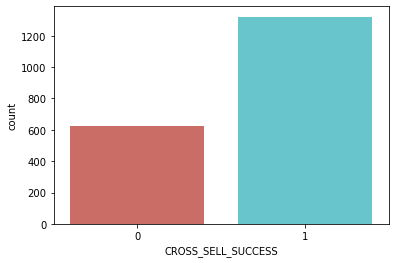

In [18]:
# PERCENTAGE OF SUBSCRIPTION
count_no_sub = len(app_chef[app_chef['CROSS_SELL_SUCCESS']==0])

count_sub = len(app_chef[app_chef['CROSS_SELL_SUCCESS']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('Presently,')
print(f"""percentage of customers that didn't subscribe to HALFWAY THERE is {pct_of_no_sub*100}% and""")

pct_of_sub = count_sub/(count_no_sub+count_sub)
print(f"""the percentage of customers that subscribed is {pct_of_sub*100}%""")

# Visualization
sns.countplot(x='CROSS_SELL_SUCCESS', data = app_chef, palette = 'hls')
plt.show()

## Correlation Analysis 

In [19]:
# Pearson Correlation between the response variable (cross_sell_success) and the explanatory variables 
df_corr = app_chef.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
PROFESSIONAL                   0.19
CANCELLATIONS_BEFORE_NOON      0.16
Total_Cancellations            0.14
has_cancelled                  0.10
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PACKAGE_LOCKER                 0.04
has_locker                     0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
PERSONAL                       0.04
PC_LOGINS                      0.04
MASTER_CLASSES_ATTENDED        0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
log_ave_prep_vid_time          0.03
EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE             0.02
log_atpv                       0.02
log_tmo                        0.02
LATE_DELIVERIES                0.01
log_revenue                    0.01
TOTAL_MEALS_ORDERED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH          

## Regression Analysis: Logistic Regression AND Decision Tree

In my logistic regression analysis, three different models and feature combinations, were created; namely logit_sig_1, _2 and _3. 
The reason for this was to try out the different combinations to see which would give the highest AUC-ROC curve score. After my selection, I went further to use a decision tree as it offers an efficient and convenient way to consider the potential choices for decision making and the number of possible outcomes. 



In [20]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
                   'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
 

 # significant variables only (set 1)
 'logit_sig_1'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                     'PC_LOGINS','MASTER_CLASSES_ATTENDED','PERSONAL','PROFESSIONAL' ],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['MOBILE_NUMBER',  'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                   'PC_LOGINS', 'MASTER_CLASSES_ATTENDED', 'PERSONAL', 'PROFESSIONAL', 
                   'out_avg_prep_vid_time',  'out_total_meals_ordered', 'out_early_deliveries', 
                   'out_master_classes_attended'],

    
 # significant variables only (set 3)
 'logit_sig_3'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                      'PERSONAL','PROFESSIONAL']
    
}
    

# Dynamically printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_1']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}


Thrid Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_3']}

""")



/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


First Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MASTER_CLASSES_ATTENDED', 'PERSONAL', 'PROFESSIONAL']


Second Significant p-value Model:
---------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MASTER_CLASSES_ATTENDED'

After conducting my analysis, logit_sig_3 had the highest AUC-ROC score of 0.639 and best numbers in terms of precisely identifying which customer would subscribe or not. 

In [21]:
# Defining a function to standardize numerical variables in the dataset:
def standard(num_df):
    """
    This function standardizes a dataframe that contains variables which are either
    integers or floats.
    
    ------
    num_df : DataFrame, must contain only numerical variables
    
    """
    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()

    # FITTING the scaler with housing_data
    scaler.fit(num_df)

    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(num_df)

    # converting scaled data into a DataFrame
    x_scaled_df = pd.DataFrame(x_scaled)
    
    # adding labels to the scaled DataFrame
    x_scaled_df.columns = num_df.columns
    
    # Re-attaching target variable to DataFrame
    #X_scaled_df = X_scaled_df.join(target_variable)
    
    # returning the standardized data frame into the global environment
    return x_scaled_df

In [22]:
# train/test split with the full model
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig_3']]
app_chef_target =  app_chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = app_chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)
# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
#print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
#print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
#logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
#logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# area under the roc curve (auc)
#print('LogReg AUC:',roc_auc_score(y_true  = y_test,
                    #y_score = logreg_pred).round(decimals = 4))



###############################################################################


###### Standardized Preparation 
# Standardizing our Data Set (only numeric variables) with user-defined function
chef_stand = standard(app_chef_data)

# Defining explanatory variables (add according to new feature selections)
app_chef_stand     = chef_stand.loc[: , candidate_dict['logit_sig_3']]

# train-test split with stratification
x_train_stand, x_test_stand, y_train_stand, y_test_stand = train_test_split(
            app_chef_stand,   # standerdized x variables 
            app_chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = app_chef_target) 

# merging training data for statsmodels
chef_train_stand = pd.concat([x_train_stand, x_train_stand], axis = 1)

# Important model on Standardized data
# INSTANTIATING a logistic regression model
logreg_stand = LogisticRegression(random_state = 219) 

# FITTING the training data
logreg_fit_stand = logreg_stand.fit(x_train_stand, y_train.values.reshape(-1,)) # removes warning on column shape

# PREDICTING based on the testing set
logreg_pred_stand = logreg_fit_stand.predict(x_test_stand)

# train accuracy
logreg_train_acc_stand  = logreg_fit_stand.score(x_train_stand, y_train_stand).round(4)

# test accuracy
logreg_test_acc_stand   = logreg_fit_stand.score(x_test_stand, y_test_stand).round(4)

# auc value
logreg_auc_stand = roc_auc_score(y_true  = y_test_stand,
                           y_score = logreg_pred_stand).round(4)

#print('Training ACCURACY:', logreg_train_acc_stand)
#print('Testing  ACCURACY:', logreg_test_acc_stand)
#print('AUC Score        :', logreg_auc_stand)

# zipping each feature name to its coefficient
logreg_model_values = zip(app_chef[candidate_dict['logit_sig_3']].columns,
                          logreg_fit_stand.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.65)
('MOBILE_NUMBER', 0.27)
('CANCELLATIONS_BEFORE_NOON', 0.42)
('TASTES_AND_PREFERENCES', 0.16)
('PERSONAL', 0.62)
('PROFESSIONAL', 0.86)


### Insights from the Logistic Regression Model  

Based on the results above, for the company to know the type of customer that will subscribe, Apprentice Chef should target customers who fit the above criteria with:
1. Ads 
2. Contacts with customer service; as they all increase the chances of subscription to HALFWAY THERE. 


## Decision Tree 

In [23]:
# PRUNED TREE #

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Pruned Tree Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(3))
print('Pruned Tree Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(3))
print('Pruned Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(3))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(3) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(3)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(3) # auc


Pruned Tree Training ACCURACY: 0.729
Pruned Tree Testing  ACCURACY: 0.733
Pruned Tree AUC Score        : 0.61


In [24]:
#######################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

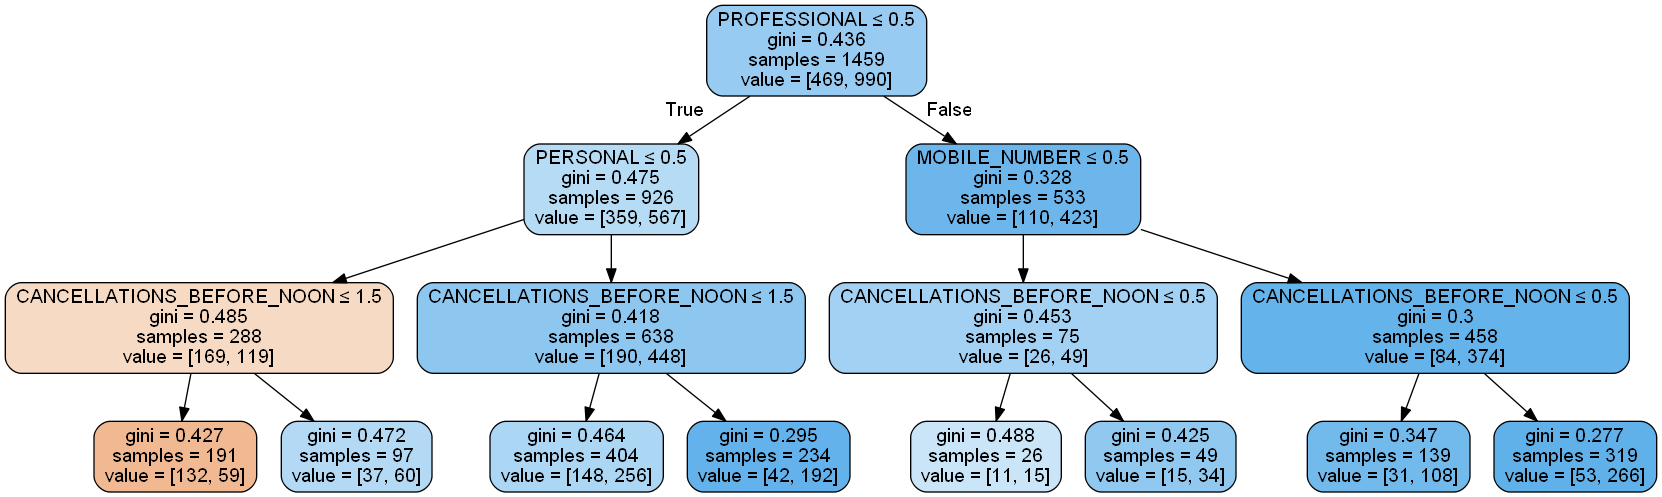

In [25]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

### Hyperparameter Tuning 

The goal here is to find an optimal combination of hyperparameters to give better results i.e to avoid underfitting and overfitting.

In [26]:
# Defining explanatory variables (add according to new feature selections)
app_chef_sig = app_chef.loc[: , candidate_dict['logit_sig_3']]

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_sig,  # change
            app_chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = app_chef_target) # stratifying target variable to ensure balance

# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1) # contains target variable!

In [27]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(app_chef_sig, app_chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(3))

<ipython-input-27-46cf20daaa4b>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-27-46cf20daaa4b>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'gini'}
Tuned Training AUC: 0.643


In [28]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(3))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(3))

print("""After the tunning you'll notice an increase in the AUC score above.""")

# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(3) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(3)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.735
Testing  ACCURACY: 0.768
AUC Score        : 0.672
After the tunning you'll notice an increase in the AUC score above.


### Confusion Matrix 

In [29]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 63
False Positives: 93
False Negatives: 20
True Positives : 311



The confusion matrix above show that in the new dataset of 487 observations that was given to the algorithm based on the best model, it precisely predicted approx. 64%(311) of customers to subscribe to HALFWAY THERE correctly and incorrectly predicted precisely 19%(93) of customers to subscribe. 

# Conclusion and Recommendation  

CONCLUSION

Apprentice Chef should apply the recommended course of action as it will help grow the business.

RECOMMENDATION

Apprentice Chef should try to be more involved in customers journey on their platforms; specifically, Apprentice Chef should add a Married category to their registration and create campaigns towards that category.   